<a href="https://colab.research.google.com/github/Sukeerthi123/Final_Project/blob/main/CardiovascularDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from scipy.ndimage import gaussian_filter1d
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df1=pd.read_csv("/content/data.csv")
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0,0.0
1,1,20228,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0,1.0
2,2,18857,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0,1.0
3,3,17623,2,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0,1.0
4,4,17474,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0,0.0


In [5]:
df1['age']=df1['age']/365

In [6]:
df1['age']=df1['age'].astype(int)

In [7]:
df1['bp']=df1['ap_lo']+((df1['ap_hi']-df1['ap_lo'])/3)
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp
0,0,50,2,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0,0.0,90.000000
1,1,55,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0,1.0,106.666667
2,2,51,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0,1.0,90.000000
3,3,48,2,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0,1.0,116.666667
4,4,47,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0,0.0,73.333333


In [8]:
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp
count,25072.000000,25072.000000,25072.000000,25072.000000,25072.000000,25072.000000,25072.000000,25071.000000,25071.000000,25071.000000,25071.000000,25071.000000,25071.000000,25072.000000
mean,17892.715260,52.806238,1.350830,164.399330,74.173455,127.334357,97.624601,1.363169,1.224881,0.091181,0.054764,0.804555,0.496390,107.527853
std,10352.852917,6.787999,0.477239,8.205966,14.352088,75.955404,211.248336,0.677531,0.570660,0.287872,0.227524,0.396551,0.499997,143.834713
min,0.000000,29.000000,1.000000,55.000000,30.000000,-140.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.333333
25%,8921.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,93.333333
50%,17900.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,93.333333
75%,26849.500000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,103.333333
max,35802.000000,64.000000,2.000000,250.000000,200.000000,11500.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,6716.666667


In [9]:
y=df1['cardio']
X=df1
X.head()
X=X.drop(['cardio'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [10]:
X_test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bp
20057,28642,54,1,166,75.0,130,80,1.0,1.0,0.0,0.0,1.0,96.666667
20058,28643,64,1,162,68.0,130,90,1.0,1.0,0.0,0.0,1.0,103.333333
20059,28644,54,1,157,70.0,130,80,1.0,1.0,0.0,0.0,1.0,96.666667
20060,28645,42,2,169,66.0,120,80,1.0,1.0,0.0,0.0,1.0,93.333333
20061,28646,56,2,170,68.0,110,70,1.0,3.0,0.0,0.0,0.0,83.333333


<Axes: >

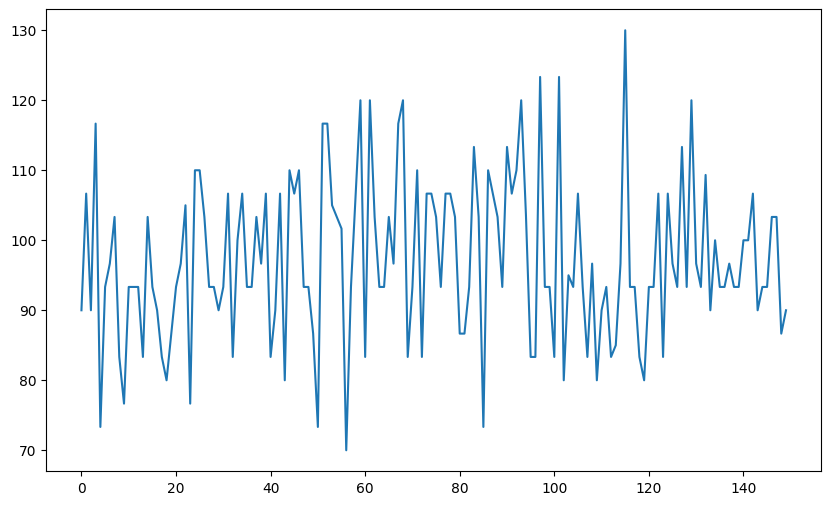

In [11]:
plt.figure(figsize=(10, 6))
df1['bp'].head(150).plot()

In [12]:
df1['bp'].groupby(pd.cut(df1['bp'], [0, 119, 129, 139, 7400])).count()

bp
(0, 119]       23736
(119, 129]       801
(129, 139]       127
(139, 7400]      408
Name: bp, dtype: int64

In [13]:
df1['cholesterol'].groupby(pd.cut(df1['cholesterol'], [0,1,2,3])).count()

cholesterol
(0, 1]    18821
(1, 2]     3395
(2, 3]     2855
Name: cholesterol, dtype: int64

In [14]:
df1['ap_hi'].groupby(pd.cut(df1['ap_hi'], [-151,70]))

In [15]:
df1['ap_hi'].groupby(pd.cut(df1['ap_hi'], [300,11001])).count()

ap_hi
(300, 11001]    8
Name: ap_hi, dtype: int64

In [16]:
df1.loc[df1['ap_hi'] < 70, 'ap_hi'] = 70

In [17]:
df1.loc[df1['ap_lo'] < 40, 'ap_lo'] = 40

In [18]:
df1.loc[df1['ap_hi'] >300, 'ap_hi'] = 300

In [19]:
df1.loc[df1['ap_lo'] >200, 'ap_lo'] = 200

In [20]:
df1['bp']=df1['ap_lo']+((df1['ap_hi']-df1['ap_lo'])/3)
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp
0,0,50,2,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0,0.0,90.000000
1,1,55,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0,1.0,106.666667
2,2,51,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0,1.0,90.000000
3,3,48,2,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0,1.0,116.666667
4,4,47,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0,0.0,73.333333


In [21]:
df1['bp'].groupby(pd.cut(df1['bp'], [0, 119, 129, 139, 7400])).count()

bp
(0, 119]       23736
(119, 129]       803
(129, 139]       127
(139, 7400]      406
Name: bp, dtype: int64

In [22]:
df1.drop(['height','weight'],axis=1).head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp
0,0,50,2,110,80,1.0,1.0,0.0,0.0,1.0,0.0,90.000000
1,1,55,1,140,90,3.0,1.0,0.0,0.0,1.0,1.0,106.666667
2,2,51,1,130,70,3.0,1.0,0.0,0.0,0.0,1.0,90.000000
3,3,48,2,150,100,1.0,1.0,0.0,0.0,1.0,1.0,116.666667
4,4,47,1,100,60,1.0,1.0,0.0,0.0,0.0,0.0,73.333333


In [23]:
#train test split
y=df1['cardio']
X=df1
X.drop(['id','cardio'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [24]:
print(X_train.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80          1.0   1.0    0.0   0.0   
1   55       1     156    85.0    140     90          3.0   1.0    0.0   0.0   
2   51       1     165    64.0    130     70          3.0   1.0    0.0   0.0   
3   48       2     169    82.0    150    100          1.0   1.0    0.0   0.0   
4   47       1     156    56.0    100     60          1.0   1.0    0.0   0.0   

   active          bp  
0     1.0   90.000000  
1     1.0  106.666667  
2     0.0   90.000000  
3     1.0  116.666667  
4     0.0   73.333333  


In [25]:
print(X_test.head())

       age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
20057   54       1     166    75.0    130     80          1.0   1.0    0.0   
20058   64       1     162    68.0    130     90          1.0   1.0    0.0   
20059   54       1     157    70.0    130     80          1.0   1.0    0.0   
20060   42       2     169    66.0    120     80          1.0   1.0    0.0   
20061   56       2     170    68.0    110     70          1.0   3.0    0.0   

       alco  active          bp  
20057   0.0     1.0   96.666667  
20058   0.0     1.0  103.333333  
20059   0.0     1.0   96.666667  
20060   0.0     1.0   93.333333  
20061   0.0     0.0   83.333333  


In [26]:
print(y_test.head())

20057    1.0
20058    1.0
20059    1.0
20060    0.0
20061    0.0
Name: cardio, dtype: float64


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
#Implementation Of ANN
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [29]:
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))

In [30]:
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))

In [31]:
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))

In [32]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [33]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [34]:
ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
627/627 [==============================] - 6s 4ms/step - loss: 0.5965 - accuracy: 0.6871
Epoch 2/100
627/627 [==============================] - 1s 2ms/step - loss: 0.5572 - accuracy: 0.7271
Epoch 3/100
627/627 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7291
Epoch 4/100
627/627 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.7313
Epoch 5/100
627/627 [==============================] - 1s 2ms/step - loss: 0.5480 - accuracy: 0.7330
Epoch 6/100
627/627 [==============================] - 2s 3ms/step - loss: 0.5467 - accuracy: 0.7321
Epoch 7/100
627/627 [==============================] - 2s 3ms/step - loss: 0.5456 - accuracy: 0.7332
Epoch 8/100
627/627 [==============================] - 1s 2ms/step - loss: 0.5442 - accuracy: 0.7344
Epoch 9/100
627/627 [==============================] - 1s 2ms/step - loss: 0.5434 - accuracy: 0.7350
Epoch 10/100
627/627 [==============================] - 1s 2ms/step - loss: 0.5426 - accura

In [35]:
#Testing with sample data
print(ann.predict(sc.transform([[57,1,158,71.0,120,80,1,1,0,0,1,93.333333]])) > 0.5)

1/1 [==============================] - 0s 104ms/step
[[False]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
#Testing with sample data
print(ann.predict(sc.transform([[49,1,180,70.0,150,100,1,1,0,0,1,116.666667]])) > 0.5)

1/1 [==============================] - 0s 25ms/step
[[ True]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
import pyrebase

In [42]:
import firebase_admin
from firebase_admin import credentials, firestore
import pyrebase

In [ ]:
cred = credentials.Certificate()  # Replace with JSON credential file path
firebase_admin.initialize_app(cred)

In [ ]:
config={
  #Replace with firebase config object
}
firebase = pyrebase.initialize_app(config)
db = firebase.database()

In [ ]:
db = firebase.database()
last_record = db.child('Collected Data').order_by_key().limit_to_last(1).get().val()
print(last_record)

OrderedDict([('-NeGw_ZxNrI7-AYcq7qV', {'active': '1', 'age': '49', 'alco': '0', 'ap_hi': '150', 'ap_lo': '100', 'bp': '116.66667', 'cholesterol': '1', 'gender': '1', 'gluc': '1', 'height': '180', 'smoke': '0', 'weight': '70'})])


In [ ]:
for key, value in last_record.items():
  print(f"Key: {key}, Value: {value}")
  for keyy, valuee in value.items():
    print(f"Key: {keyy}, Value: {valuee}")
    if(keyy=="active"):
      act=valuee
    elif(keyy=="age"):
      age=valuee
    elif(keyy=="alco"):
      alco=valuee
    elif(keyy=="ap_hi"):
      ap_hi=valuee
    elif(keyy=="ap_lo"):
      ap_lo=valuee
    elif(keyy=="bp"):
      bp=valuee
    elif(keyy=="cholesterol"):
      cholesterol=valuee
    elif(keyy=="gender"):
      gender=valuee
    elif(keyy=="gluc"):
      gluc=valuee
    elif(keyy=="height"):
      height=valuee
    elif(keyy=="smoke"):
      smoke=valuee
    elif(keyy=="weight"):
      weight=valuee


Key: -NeGw_ZxNrI7-AYcq7qV, Value: {'active': '1', 'age': '49', 'alco': '0', 'ap_hi': '150', 'ap_lo': '100', 'bp': '116.66667', 'cholesterol': '1', 'gender': '1', 'gluc': '1', 'height': '180', 'smoke': '0', 'weight': '70'}
Key: active, Value: 1
Key: age, Value: 49
Key: alco, Value: 0
Key: ap_hi, Value: 150
Key: ap_lo, Value: 100
Key: bp, Value: 116.66667
Key: cholesterol, Value: 1
Key: gender, Value: 1
Key: gluc, Value: 1
Key: height, Value: 180
Key: smoke, Value: 0
Key: weight, Value: 70


In [ ]:
res=ann.predict(sc.transform([[age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,act,bp ]])) > 0.5

1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(res)

[[ True]]


In [ ]:
cd /content/drive/MyDrive/templates

/content/drive/MyDrive/templates


In [ ]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://zsgidady67n-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [ ]:
from flask import Flask, render_template, request

In [ ]:
import pyrebase

In [ ]:
import pyrebase
from flask import Flask, render_template, request, redirect, url_for

app = Flask(__name__, template_folder='/content/drive/MyDrive/templates')


firebase_config = {
  # Replace with firebase configuration object
}


firebase = pyrebase.initialize_app(firebase_config)
db = firebase.database()

@app.route('/', methods=['GET'])
def index():
    return render_template('details.html')# Replace with html file

@app.route('/submit', methods=['POST'])
def submit():
    if request.method == 'POST':
        age = request.form.get('age')
        gender = request.form.getlist('gender')
        height = request.form.get('height')
        weight = request.form.get('weight')
        ap_hi = request.form.get('ap_hi')
        ap_lo = request.form.get('ap_lo')
        cholesterol = request.form.getlist('cholesterol')
        gluc = request.form.getlist('gluc')
        smoke = request.form.getlist('smoke')
        alco = request.form.getlist('alco')
        active = request.form.getlist('active')
        bp = request.form.get('bp')

        # Add the data to Firebase
        data = {
            'age': age,
            'gender': str(gender[0]),
            'height': height,
            'weight': weight,
            'ap_hi': ap_hi,
            'ap_lo': ap_lo,
            'cholesterol': str(cholesterol[0]),
            'gluc': str(gluc[0]),
            'smoke': str(smoke[0]),
            'alco': str(alco[0]),
            'active': str(active[0]),
            'bp': bp
        }
        db.child("Collected Data").push(data)

        last_record = db.child('Collected Data').order_by_key().limit_to_last(1).get().val()
        for key, value in last_record.items():
          print(f"Key: {key}, Value: {value}")
          for keyy, valuee in value.items():
            print(f"Key: {keyy}, Value: {valuee}")
            if(keyy=="active"):
              act=valuee
            elif(keyy=="age"):
              age=valuee
            elif(keyy=="alco"):
              alco=valuee
            elif(keyy=="ap_hi"):
              ap_hi=valuee
            elif(keyy=="ap_lo"):
              ap_lo=valuee
            elif(keyy=="bp"):
              bp=valuee
            elif(keyy=="cholesterol"):
              cholesterol=valuee
            elif(keyy=="gender"):
              gender=valuee
            elif(keyy=="gluc"):
              gluc=valuee
            elif(keyy=="height"):
              height=valuee
            elif(keyy=="smoke"):
              smoke=valuee
            elif(keyy=="weight"):
              weight=valuee
    result=ann.predict(sc.transform([[age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,act,bp ]])) > 0.5
    print(result)
    if(result[0][0]):
      result="Parameters are not in control. Please visit the doctor for further guidance"
    else:
      result="Parameters are in good control. Stay healthy"

    return render_template('details.html', result=result)



if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [16/Sep/2023 13:40:32] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [16/Sep/2023 13:40:33] "GET /favicon.ico HTTP/1.1" 404 -


Key: -NeTDKpLGdqIhv-if8nt, Value: {'active': '1', 'age': '64', 'alco': '0', 'ap_hi': '130', 'ap_lo': '90', 'bp': '103.33333', 'cholesterol': '1', 'gender': '1', 'gluc': '1', 'height': '162', 'smoke': '0', 'weight': '68'}
Key: active, Value: 1
Key: age, Value: 64
Key: alco, Value: 0
Key: ap_hi, Value: 130
Key: ap_lo, Value: 90
Key: bp, Value: 103.33333
Key: cholesterol, Value: 1
Key: gender, Value: 1
Key: gluc, Value: 1
Key: height, Value: 162
Key: smoke, Value: 0
Key: weight, Value: 68
1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [16/Sep/2023 13:41:14] "POST /submit HTTP/1.1" 200 -


[[ True]]


INFO:werkzeug:127.0.0.1 - - [16/Sep/2023 13:41:15] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [16/Sep/2023 13:42:29] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [16/Sep/2023 13:42:30] "GET /favicon.ico HTTP/1.1" 404 -


Key: -NeTDnDFLtMarJyKPxI7, Value: {'active': '1', 'age': '42', 'alco': '0', 'ap_hi': '120', 'ap_lo': '80', 'bp': '93.33333', 'cholesterol': '1', 'gender': '2', 'gluc': '1', 'height': '169', 'smoke': '0', 'weight': '66'}
Key: active, Value: 1
Key: age, Value: 42
Key: alco, Value: 0
Key: ap_hi, Value: 120
Key: ap_lo, Value: 80
Key: bp, Value: 93.33333
Key: cholesterol, Value: 1
Key: gender, Value: 2
Key: gluc, Value: 1
Key: height, Value: 169
Key: smoke, Value: 0
Key: weight, Value: 66
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [16/Sep/2023 13:43:14] "POST /submit HTTP/1.1" 200 -


[[False]]


INFO:werkzeug:127.0.0.1 - - [16/Sep/2023 13:43:15] "GET /favicon.ico HTTP/1.1" 404 -
